### We will be Analysing the Bike Sharing Trends from UCI Machine Learning Repository. 

#### Proble Statement: We need to forecast bike rental demand for bike sharing program. 

The bike sharing platforms from across the world are hotspots of all sorts of data, ranging from travel time, start and end location, demographics of riders, and so on. This data along with alternate sources of information such as weather, traffic, terrain, and so on makes it an attractive proposition for different research areas.

The bike sharing dataset contains day level and hour level data. We will be concentrating only on hourly data available in hour.csv

#### Pre-processing

We begin with loading the hour.csv and checking the shape of the loaded dataframe. 

In [20]:
# data manipulation 
import pandas as pd
import numpy as np

# plotting
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# setting params
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

sn.set_style('whitegrid')
sn.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600

# pandas display data frames as tables
from IPython.display import display, HTML

In [21]:
hour_df = pd.read_csv('hour.csv')
print("Shape of dataset:: {}".format(hour_df.shape))

Shape of dataset:: (17379, 17)


In [22]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [23]:
#Check what data types has inferred and if any of the attributes require type conversions.
hour_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [24]:
# dteday would require type conversion from object (or string type) to timestamp

# We rename the column names for better understanding
hour_df.rename(columns = {'instant':'rec_id',
                         'dteday':'datetime',
                         'holiday':'is_holiday',
                         'workingday':'is_workingday',
                         'weathersit':'weather_condition',
                         'hum':'humidity',
                         'mnth':'month',
                         'cnt':'total_count',
                         'hr':'hour',
                         'yr':'year'}, inplace=True)

In [30]:
# See the first few lines of the table

hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [36]:
hour_df.shape

(17379, 17)

In [26]:
# perform type-casting of attributes using utilities like pd.to_datetime() and astype()

# date time conversion
    
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

# categorical variables
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')


[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

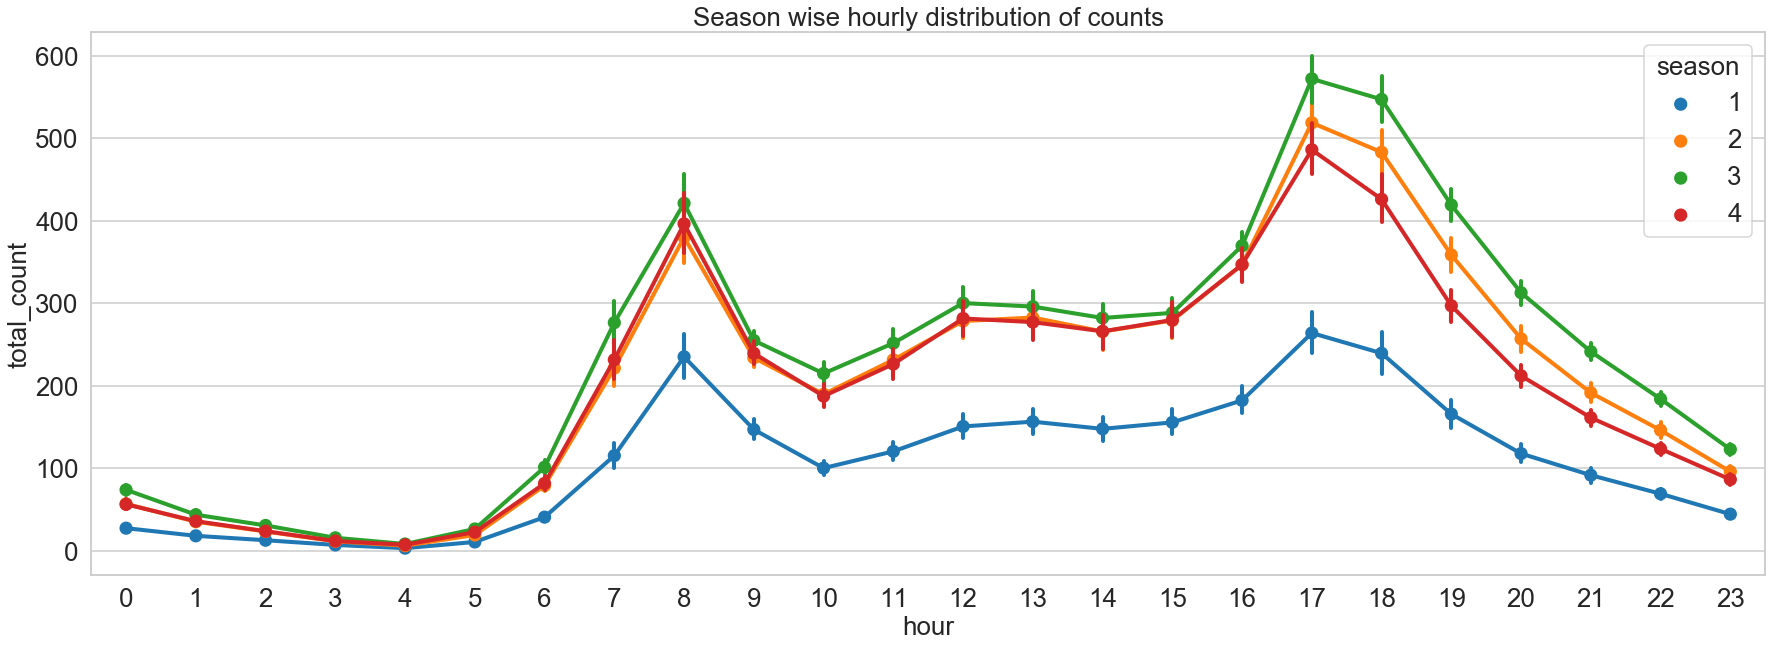

In [27]:
# visualizing hourly ridership counts across the seasons
fix,ax = plt.subplots()
sn.pointplot(data=hour_df[['hour',
                           'total_count',
                           'season']],
             x='hour',y='total_count',
             hue='season',ax=ax)
ax.set(title="Season wise hourly distribution of counts")

[Text(0.5, 1.0, 'Monthly distribution of counts')]

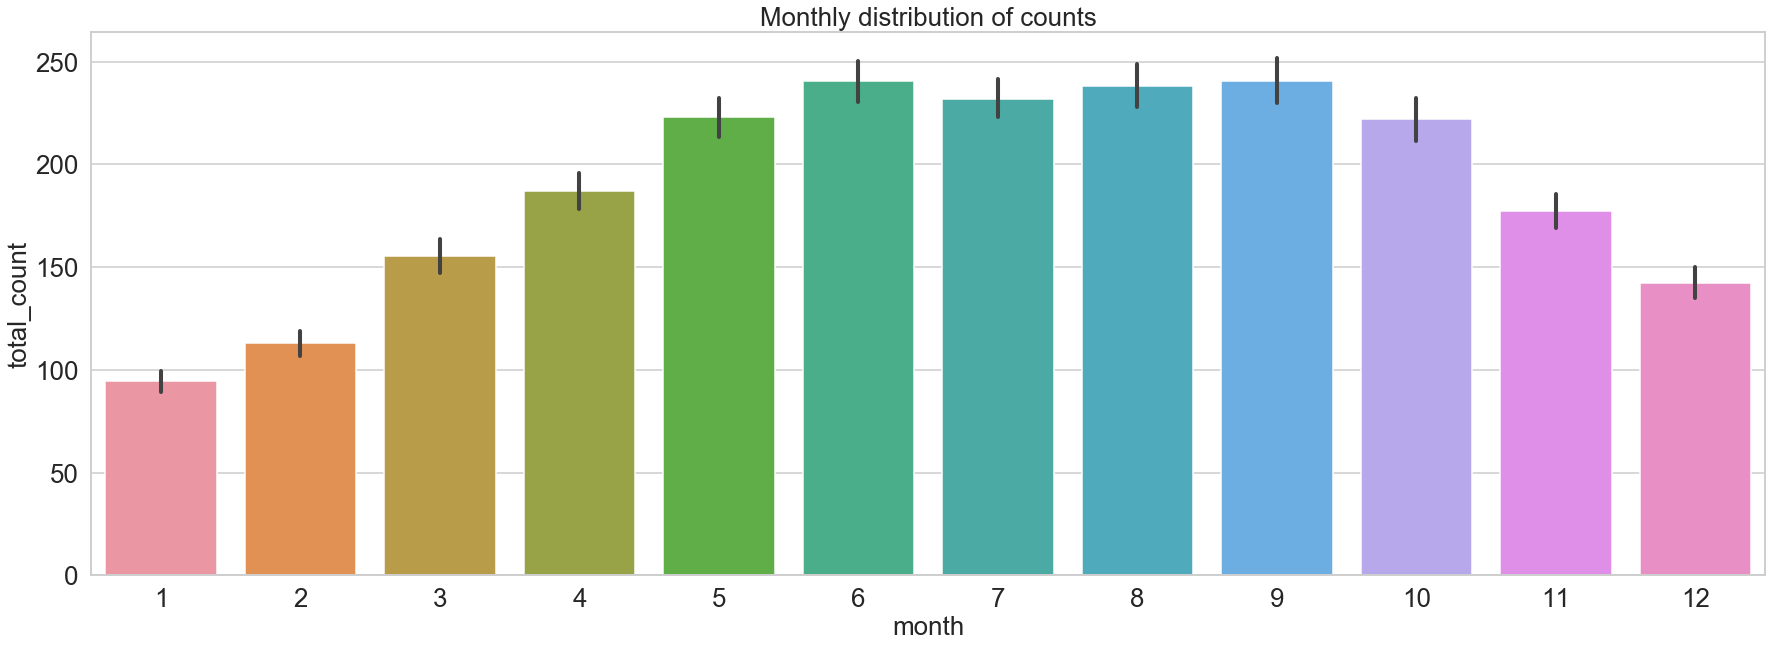

In [28]:
# now  we will generate a barplot showcases a definite trend in ridership based on month of the year
fig,ax = plt.subplots()
sn.barplot(data=hour_df[['month',
                         'total_count']],
           x="month",y="total_count")
ax.set(title="Monthly distribution of counts")

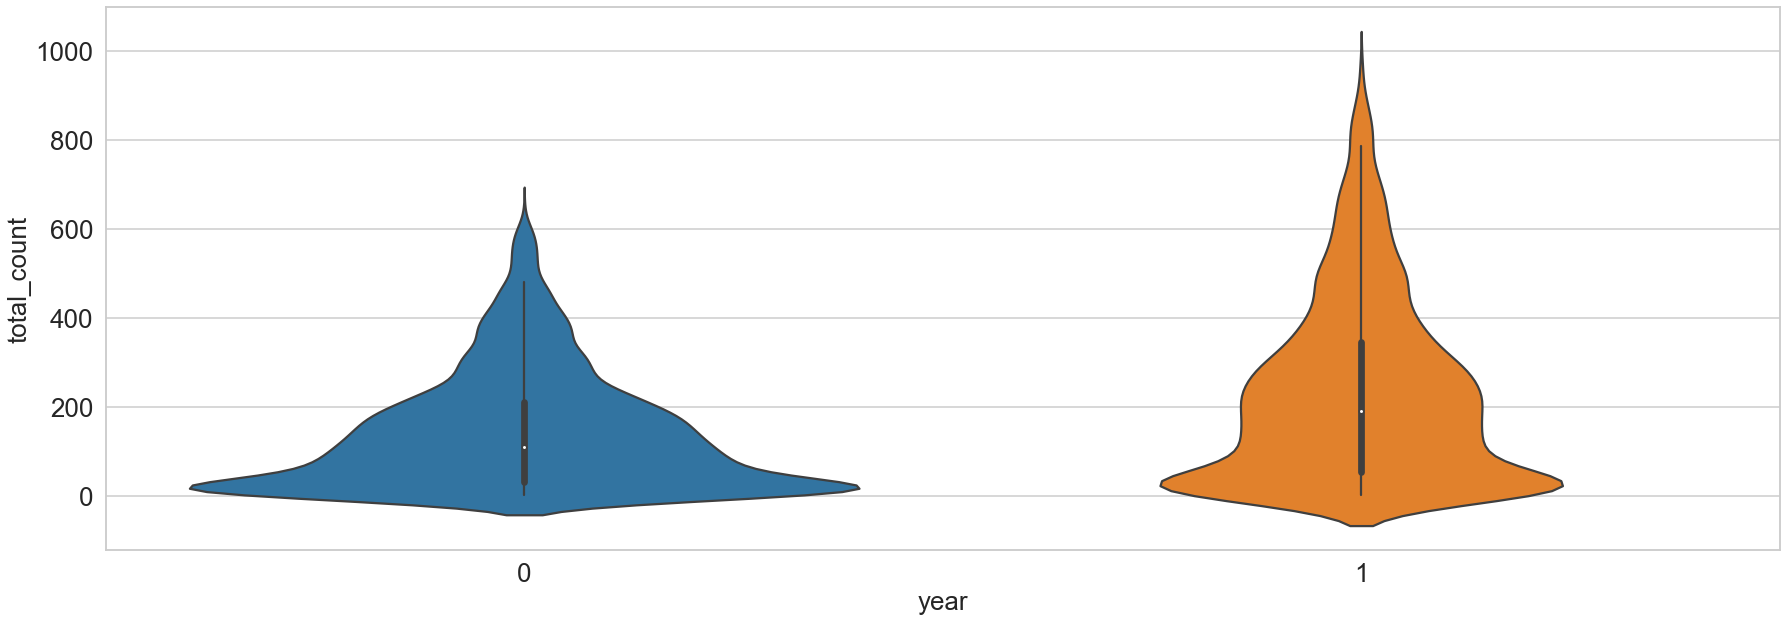

In [37]:
 # plots yearly distribution on violin plots
sn.violinplot(data=hour_df[['year',
                            'total_count']],
              x="year",y="total_count")

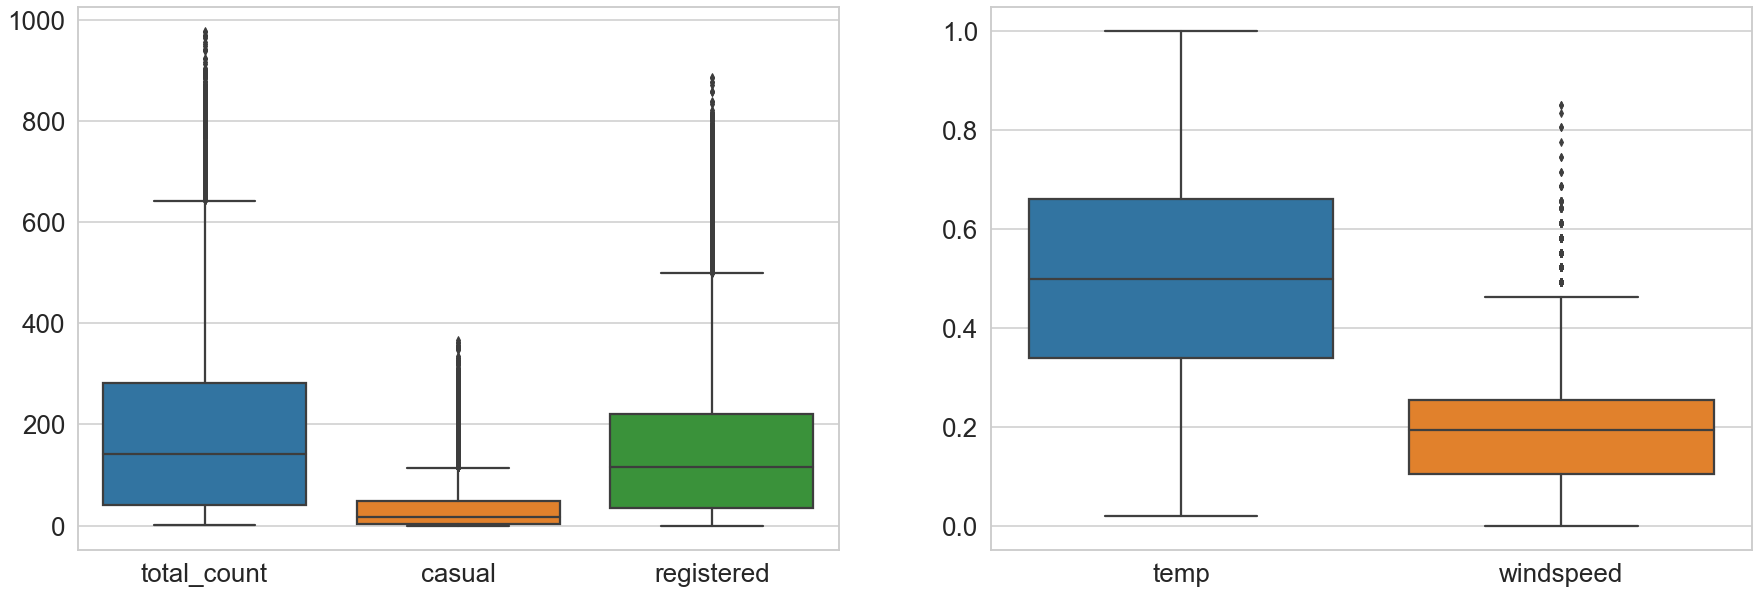

In [38]:
#Finding the outliers using box plots
fig,(ax1,ax2)= plt.subplots(ncols=2)
sn.boxplot(data=hour_df[['total_count',
                         'casual','registered']],ax=ax1)
sn.boxplot(data=hour_df[['temp','windspeed']],ax=ax2)

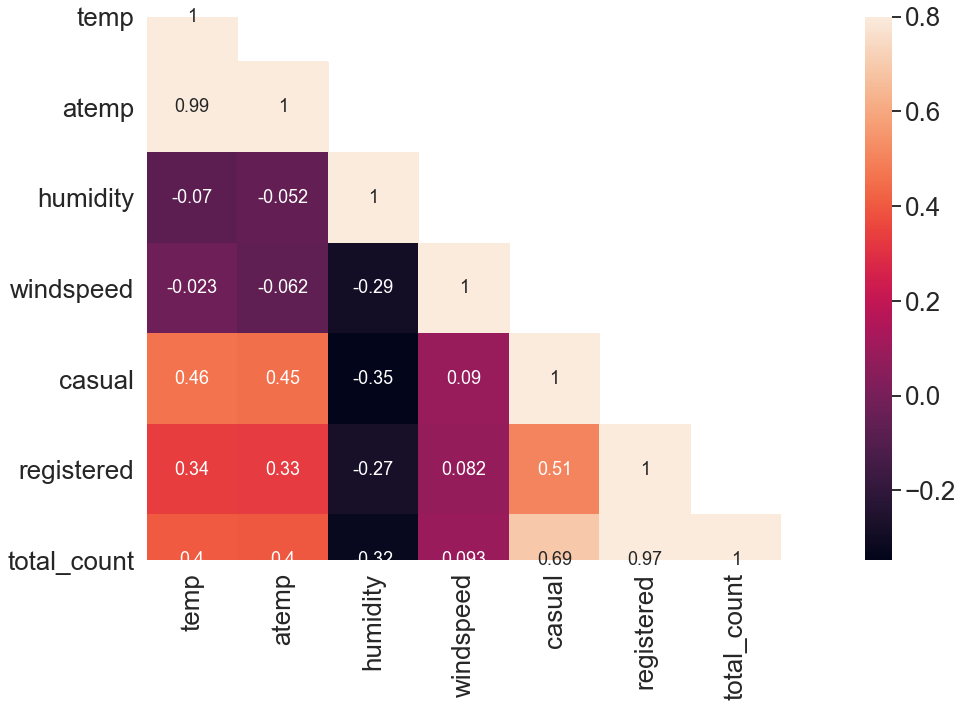

In [41]:
# correlational matrix using the pandas utility function corr() & it helps us understand relationships between different attributes of the data.
corrMatt = hour_df[["temp","atemp",
                    "humidity","windspeed",
                    "casual","registered",
                    "total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(corrMatt, mask=mask,
vmax=.8, square=True,annot=True)